In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [34]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
session = Session(engine)
inspect(engine).get_table_names()

['measurement', 'station']

In [35]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [36]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [64]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [86]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')


for c in columns:
    print(c['name'])

id
station
date
prcp
tobs


# Exploratory Precipitation Analysis

In [119]:
# Find the most recent date in the data set.
import datetime as dt


session.query(Measurement.date).order_by(Measurement.date.desc()).first()




('2017-08-23',)

In [156]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

date = dt.datetime(2017, 8, 23)

results = (
    session
    .query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date > '2016-08-23')
    .order_by(Measurement.date)
    .limit(20)
    .all()
)
results

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01)]

In [157]:
[result[0] for result in results]


['2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26']

In [158]:
[result[1] for result in results]

[0.08,
 2.15,
 2.28,
 None,
 1.22,
 2.15,
 1.45,
 0.08,
 0.08,
 0.0,
 0.0,
 0.21,
 0.06,
 0.11,
 0.0,
 0.03,
 0.02,
 0.04,
 0.0,
 0.01]

In [159]:
# Measurement id and prcp from results 

date = [result[0] for result in results]
print(date)

prcp = [result[1] for result in results]
print(prcp)

['2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-26', '2016-08-26', '2016-08-26', '2016-08-26', '2016-08-26', '2016-08-26']
[0.08, 2.15, 2.28, None, 1.22, 2.15, 1.45, 0.08, 0.08, 0.0, 0.0, 0.21, 0.06, 0.11, 0.0, 0.03, 0.02, 0.04, 0.0, 0.01]


In [196]:

# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

df = pd.DataFrame(results, columns=['date', 'prcp'])
df


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


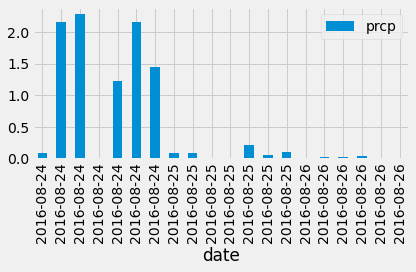

In [161]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(results, columns=['date', 'prcp'])


df.set_index('date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()

In [162]:
# Use Pandas to calcualte the summary statistics for the precipitation data
statistics = [Measurement.prcp, 
       func.avg(Measurement.id), 
       func.avg(Measurement.station), 
       func.avg(Measurement.date), 
       func.avg(Measurement.tobs)]

statistics

 <sqlalchemy.sql.functions.Function at 0x1eafc8c54f0; avg>,
 <sqlalchemy.sql.functions.Function at 0x1eafca99460; avg>,
 <sqlalchemy.sql.functions.Function at 0x1eafca99f40; avg>,
 <sqlalchemy.sql.functions.Function at 0x1eafc9fdfa0; avg>]

In [171]:
prcp_averages = (
    session.query(*statistics)
    .filter(func.strftime("%m", Measurement.prcp))
    .group_by(Measurement.prcp)
    .order_by(Measurement.prcp)
    .all())
prcp_averages

[(0.0, 9048.51093463653, 0.0, 2013.0858888210141, 73.20268784361637),
 (0.01, 9309.257095158599, 0.0, 2012.864774624374, 73.2195325542571),
 (0.02, 8738.69254658385, 0.0, 2013.0041407867495, 73.4927536231884),
 (0.03, 8818.21216407355, 0.0, 2013.007072135785, 73.18387553041019),
 (0.04, 8656.416149068324, 0.0, 2012.8819875776398, 73.4472049689441),
 (0.05, 8800.581545064379, 0.0, 2013.2145922746781, 73.96781115879828),
 (0.06, 9104.269333333334, 0.0, 2013.2506666666666, 73.63466666666666),
 (0.07, 9782.788961038961, 0.0, 2013.159090909091, 73.63636363636364),
 (0.08, 9436.772435897436, 0.0, 2013.003205128205, 73.4423076923077),
 (0.09, 9830.53043478261, 0.0, 2013.0304347826086, 73.47391304347826),
 (0.1, 10919.828282828283, 0.0, 2013.2053872053873, 72.86531986531986),
 (0.11, 10149.011173184357, 0.0, 2013.268156424581, 73.30167597765363),
 (0.12, 10135.47926267281, 0.0, 2013.0921658986176, 73.05069124423963),
 (0.13, 9897.709497206704, 0.0, 2013.31843575419, 72.72625698324022),
 (0.14,

# Exploratory Station Analysis

In [167]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Measurement.station)).all()

[(19550,)]

In [168]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(func.max(Measurement.station)).all()

[('USC00519523',)]

In [170]:
active_stations = [Measurement.station, 
       func.max(Measurement.id), 
       func.max(Measurement.date), 
       func.max(Measurement.prcp), 
       func.max(Measurement.tobs)]

active_stations

 <sqlalchemy.sql.functions.max at 0x1eafe97d2b0; max>,
 <sqlalchemy.sql.functions.max at 0x1eafe97d100; max>,
 <sqlalchemy.sql.functions.max at 0x1eafe97d6a0; max>,
 <sqlalchemy.sql.functions.max at 0x1eafe97d280; max>]

In [175]:
stations = (
    session.query(*active_stations)
    .filter(func.strftime("%m", Measurement.prcp))
    .group_by(Measurement.prcp)
    .order_by(Measurement.prcp)
    .all())
stations

[('USC00511918', 19528, '2017-08-23', 0.0, 87.0),
 ('USC00519397', 19475, '2017-08-20', 0.01, 87.0),
 ('USC00513117', 19507, '2017-08-21', 0.02, 84.0),
 ('USC00519397', 19448, '2017-07-25', 0.03, 81.0),
 ('USC00519397', 19496, '2017-08-04', 0.04, 82.0),
 ('USC00513117', 19534, '2017-08-17', 0.05, 83.0),
 ('USC00519523', 19531, '2017-08-18', 0.06, 83.0),
 ('USC00511918', 19537, '2017-08-16', 0.07, 83.0),
 ('USC00519397', 19349, '2017-08-23', 0.08, 87.0),
 ('USC00519281', 19546, '2017-08-19', 0.09, 85.0),
 ('USC00519397', 19518, '2017-08-08', 0.1, 83.0),
 ('USC00519523', 19439, '2017-07-25', 0.11, 82.0),
 ('USC00519523', 19382, '2017-08-16', 0.12, 83.0),
 ('USC00514830', 19544, '2017-08-17', 0.13, 82.0),
 ('USC00519397', 19539, '2017-08-12', 0.14, 83.0),
 ('USC00514830', 19536, '2017-08-09', 0.15, 82.0),
 ('USC00514830', 19055, '2017-07-17', 0.16, 82.0),
 ('USC00519523', 19407, '2017-06-20', 0.17, 81.0),
 ('USC00519523', 19214, '2017-07-07', 0.18, 82.0),
 ('USC00513117', 19138, '2017-06-

In [177]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

busy_station = session.query(Measurement.tobs).\
                  filter(Measurement.tobs).filter(Measurement.station == 'USC00519523').all()
busy_station

[(75.0,),
 (75.0,),
 (77.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (68.0,),
 (63.0,),
 (69.0,),
 (72.0,),
 (68.0,),
 (61.0,),
 (60.0,),
 (65.0,),
 (68.0,),
 (68.0,),
 (70.0,),
 (77.0,),
 (74.0,),
 (67.0,),
 (70.0,),
 (66.0,),
 (75.0,),
 (72.0,),
 (65.0,),
 (76.0,),
 (69.0,),
 (71.0,),
 (65.0,),
 (69.0,),
 (72.0,),
 (68.0,),
 (66.0,),
 (65.0,),
 (68.0,),
 (65.0,),
 (76.0,),
 (63.0,),
 (71.0,),
 (70.0,),
 (66.0,),
 (71.0,),
 (70.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (59.0,),
 (68.0,),
 (67.0,),
 (63.0,),
 (74.0,),
 (66.0,),
 (63.0,),
 (63.0,),
 (62.0,),
 (69.0,),
 (73.0,),
 (73.0,),
 (69.0,),
 (69.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (69.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (76.0,),
 (75.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (67.0,),
 (68.0,),
 (71.0,),
 (70.0,),
 (73.0,),
 (67.0,),
 (77.0,),
 (73.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (72.0,),
 (72.0,),
 (72.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (76.0,),


In [194]:
stat = [Measurement.station, 
       func.max(Measurement.tobs)]

stat

 <sqlalchemy.sql.functions.max at 0x1eaff1258b0; max>]

In [195]:
busy_stat = (session.query(*stat)
    .filter(func.strftime("%m", Measurement.station) == "USC00519523")).all()

busy_stat

[(None, None)]

In [205]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = (
    session
    .query(Measurement.tobs, Measurement.id)
    .filter(Measurement.station == "USC00519523")
    .order_by(Measurement.date)
    .limit(20)
    .all()
)
temps

[(75.0, 9519),
 (75.0, 9520),
 (77.0, 9521),
 (75.0, 9522),
 (75.0, 9523),
 (72.0, 9524),
 (68.0, 9525),
 (63.0, 9526),
 (69.0, 9527),
 (72.0, 9528),
 (68.0, 9529),
 (61.0, 9530),
 (60.0, 9531),
 (65.0, 9532),
 (68.0, 9533),
 (68.0, 9534),
 (70.0, 9535),
 (77.0, 9536),
 (74.0, 9537),
 (67.0, 9538)]

In [208]:
df1 = pd.DataFrame(temps, columns=['tobs', 'id'])
df1


,tobs,id
0,75.0,9519
1,75.0,9520
2,77.0,9521
3,75.0,9522
4,75.0,9523
5,72.0,9524
6,68.0,9525
7,63.0,9526
8,69.0,9527
9,72.0,9528


<Figure size 1008x576 with 0 Axes>

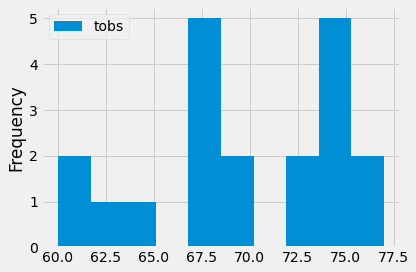

In [219]:
# Plot the Results in a Matplotlib bar chart

df1 = pd.DataFrame(temps, columns=['tobs', 'id'])

plt.figure(figsize=(14,8))
df1.set_index('id', inplace=True)
df1.plot.hist(df1)
plt.tight_layout()
plt.show()

# Close session

In [45]:
# Close Session
session.close()